In [1]:
import os
import sys
import json
import pickle
import numpy as np
import pandas as pd
sys.path.append(os.path.join(os.path.dirname('src'), '..'))
from utils import *
import scipy.io

In [2]:
#np_dir = r'E:\PhD Work (Local)\Sit to Stand Fall Risk\S2S\S2SNPY'
np_dir = r'E:\PhD Work (Local)\Sit to Stand Fall Risk\data\np'
files = os.listdir(np_dir)
files = [f.split('.')[0] for f in files]

In [3]:
data_movement = pd.read_csv(r'../../stats/dataMovement.csv')
data_clean = pd.read_csv(r'../../stats/dataClean.csv')

In [4]:
filtered_data_movement = data_movement[data_movement['X'].isin(data_clean['X'])]

In [5]:
common = set(filtered_data_movement['subjectid']).intersection(set(files))

In [7]:
# with open(r'../../stats/common_subjects.pkl', 'wb') as f:
#     pickle.dump(common, f)

In [6]:
common_data_movement = filtered_data_movement[filtered_data_movement['subjectid'].isin(common)]

In [7]:
common_data_movement = common_data_movement.reset_index(drop=True)

In [8]:
common_data_movement.head()

,X,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,...,neck_max_y_acc_stand2sit,ank_to_hip_dist_sit,ank_to_hip_dist_stand,knee_to_hip_dist_sit,knee_to_hip_dist_stand,height,lknee_angle_first_sit,rknee_angle_first_sit,lknee_angle_first_stand,rknee_angle_first_stand
0,1,kGhQ1FQc,L,29.97003,5,18.752067,-0.275275,0.27,0.631539,0.058177,...,3.505124,1.081186,1.006474,1.221493,0.869235,0.974188,104.281728,130.765245,174.111505,170.157767
1,3,KyINSk8e,R,29.97003,5,13.346667,-0.216883,0.37,0.395926,0.071269,...,3.654509,1.057510,1.018101,0.979709,0.735422,0.949425,113.416249,122.046417,183.473800,170.403354
2,5,ybGzWMPA,R,29.97003,5,9.175833,0.108442,0.54,0.152175,0.044839,...,4.730823,1.324459,1.407150,1.272274,1.064869,0.963154,110.360354,116.014708,154.888698,154.736858
3,6,b632WDpF,R,30.00000,4,11.033333,0.133333,0.36,0.234965,0.031573,...,3.772340,1.523048,1.506615,1.525126,1.145206,0.948291,359.999821,132.874089,179.434883,172.483812
4,7,UDXlpEgF,R,29.97003,5,11.444767,-0.108442,0.44,0.225910,0.045701,...,5.261429,1.017858,0.947927,0.879847,0.623896,0.993858,113.339615,115.098166,178.141457,171.161810


In [9]:
common_data_clean = data_clean[data_clean['X'].isin(common_data_movement['X'])]

In [87]:
# import shutil
# import os

# # Paths to the directories
# source_dir = r'E:\PhD Work (Local)\Sit to Stand Fall Risk\np'  # Replace with the path to your folder with 600 files
# target_dir = r'E:\PhD Work (Local)\Sit to Stand Fall Risk\np_selected'  # Replace with the path to your target folder

# # Ensure the target directory exists
# os.makedirs(target_dir, exist_ok=True)

# # Assuming 'common' is a list of filenames you want to copy
# for file_name in common:
#     # Append '.npy' extension to the file name
#     file_name_with_extension = file_name + '.npy'

#     # Construct the full file path
#     source_file = os.path.join(source_dir, file_name_with_extension)
    
#     # Check if the file exists in the source directory
#     if os.path.exists(source_file):
#         # Copy the file to the target directory
#         shutil.copy(source_file, target_dir)
#     else:
#         print(f"File {file_name} not found in source directory.")

In [14]:
videometa = {}
with open("../../videometa.pkl", 'rb') as file: 
    videometa = pickle.load(file)

time_series = {}

for subject_id in common:
    framerate = videometa[subject_id]['framerate']
    if framerate == 120:
        framerate = 30
    res, ups, downs, results = process_subject(subject_id, r'E:\PhD Work (Local)\Sit to Stand Fall Risk\data\np_selected\\',  framerate, to_smooth=True)
    res = res[10:, np.arange(75) % 3 != 2]
    res = res.reshape(res.shape[0],-1, 2)
    time_series[subject_id] = {
        'data': res,
        'framerate': framerate,
        'ups': ups,
        'downs': downs,
        'results': results
    }

In [15]:
np.save('time_series_without_delta.npy', time_series)

In [10]:
t = time_series['PHr2f4TQ']
t.keys()

dict_keys(['data', 'framerate', 'ups', 'downs', 'results'])

In [79]:
for key, value in time_series.items():
    scipy.io.savemat(f'm_{key}.mat', {
        'data': value['data'],      # Save the time series data
        'framerate': value['framerate']  # Save the framerate
    })

In [10]:
lyapExp = pd.read_csv(r'../../stats/MSE.csv', index_col=None)
lyapExp.head()

,subjectid,MSE1,MSE2,MSE3,MSE4,MSE5,MSE6,MSE7,MSE8,MSE9,...,MSE11,MSE12,MSE13,MSE14,MSE15,MSE16,MSE17,MSE18,MSE19,MSE20
0,02MJoCiL,0.065163,0.121386,0.194197,0.245189,0.303136,0.320168,0.280713,0.247241,0.209721,...,0.071459,0.202524,0.117783,0.122602,0.177681,0.145182,0.211309,0.167054,0.348307,0.207639
1,0Srk33xU,0.060901,0.110983,0.173511,0.209918,0.197218,0.156842,0.045722,0.094187,0.077558,...,0.057158,0.154151,0.117783,0.066691,0.046520,0.057158,0.223144,0.154151,0.117783,0.287682
2,0nUjlcd7,0.053122,0.105063,0.161441,0.227507,0.280409,0.357526,0.392855,0.321320,0.226313,...,0.179048,0.169076,0.100083,0.075508,0.082238,0.255933,0.054067,0.064539,0.000000,0.105361
3,15IPa5iS,0.036394,0.075597,0.108821,0.144773,0.188966,0.227259,0.264693,0.189323,0.209092,...,0.091881,0.080043,0.046251,0.087647,0.059592,0.095310,0.054067,0.037271,0.157629,0.064539
4,1O18MObh,0.053831,0.097507,0.149935,0.203217,0.260601,0.290396,0.343133,0.285447,0.355341,...,0.014815,0.075508,0.064539,0.095310,0.031749,0.070204,0.150823,0.024098,0.053110,0.103184


In [16]:
len(list(set(lyapExp['subjectid']).intersection(set(common))))

311

In [17]:
merged_data = pd.merge(common_data_movement, lyapExp, on='subjectid', how='left')
merged_data.head()

,X,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,...,MSE11,MSE12,MSE13,MSE14,MSE15,MSE16,MSE17,MSE18,MSE19,MSE20
0,1,kGhQ1FQc,L,29.97003,5,18.752067,-0.275275,0.27,0.631539,0.058177,...,0.205071,0.146142,0.165712,0.092709,0.081346,0.090597,0.103032,0.119959,0.111226,0.119347
1,3,KyINSk8e,R,29.97003,5,13.346667,-0.216883,0.37,0.395926,0.071269,...,0.194156,0.182322,0.170958,0.253781,0.219363,0.254892,0.315081,0.175891,0.175891,0.374693
2,5,ybGzWMPA,R,29.97003,5,9.175833,0.108442,0.54,0.152175,0.044839,...,0.084557,0.080043,0.029853,0.000000,0.080043,0.207639,0.095310,0.000000,0.095310,0.000000
3,6,b632WDpF,R,30.00000,4,11.033333,0.133333,0.36,0.234965,0.031573,...,0.092782,0.054067,0.056089,0.089612,0.054067,0.098440,0.042560,0.083382,0.125163,0.000000
4,7,UDXlpEgF,R,29.97003,5,11.444767,-0.108442,0.44,0.225910,0.045701,...,0.041385,0.020203,0.031749,0.068993,0.088947,0.046520,0.068993,0.000000,0.105361,0.054067


In [18]:
len(merged_data)

324

In [19]:
merged_data.to_csv(r'../../stats/justchecking.csv', index=False)

In [29]:
merge_data_subset = merged_data[['X', 'lyapunovExponent','approxEntropy','sampleEntropy','MSE1','MSE2',	'MSE3',	'MSE4',	'MSE5',	'Ci', 'half_cycle_regularity', 'full_cycle_regularity', 'symmetry_1', 'symmetry_2']]

In [27]:
MSE_subset = merged_data[['X', 'MSE1', 'MSE2', 'MSE3', 'MSE4', 'MSE5', 'MSE6', 'MSE7', 'MSE8', 'MSE9', 'MSE10', 'MSE11', 'MSE12', 'MSE13', 'MSE14', 'MSE15', 'MSE16', 'MSE17', 'MSE18', 'MSE19', 'MSE20']]

In [30]:
merge_data_subset

,X,lyapunovExponent,approxEntropy,sampleEntropy,MSE1,MSE2,MSE3,MSE4,MSE5,Ci,half_cycle_regularity,full_cycle_regularity,symmetry_1,symmetry_2
0,1,-0.010672,0.190737,0.067910,0.028841,0.067260,0.091263,0.115035,0.153454,0.455853,0.689348,0.456817,1.509024,0.232531
1,3,-0.044050,0.255143,0.193126,0.051948,0.096968,0.154943,0.237724,0.297754,0.839337,0.700807,0.483409,1.449719,0.217398
2,5,-0.002300,0.270299,0.177795,0.059636,0.111123,0.162093,0.168689,0.122186,0.623726,0.765325,0.557260,1.373372,0.208065
3,6,-0.129897,0.250281,0.187636,0.055927,0.089732,0.134180,0.166497,0.202769,0.649104,0.754708,0.523780,1.440886,0.230927
4,7,-0.028151,0.200888,0.150045,0.066520,0.120741,0.189687,0.264118,0.299111,0.940176,0.788532,0.576963,1.366694,0.211569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,669,-0.044907,0.173419,0.116037,0.055617,0.119316,0.194195,0.259464,0.333773,0.962366,0.407886,0.247216,1.649922,0.160671
320,670,0.027440,0.220129,0.127853,0.055900,0.089582,0.132742,0.160930,0.230161,0.669316,0.735286,0.521556,1.409793,0.213730
321,673,-0.053087,0.204000,0.174134,0.057741,0.109073,0.159421,0.197722,0.169685,0.693641,0.669558,0.510123,1.312544,0.159436
322,674,-0.054629,0.233886,0.266094,0.094360,0.104376,0.074824,0.040274,0.052644,0.366478,0.742828,0.563714,1.317738,0.179114


In [21]:
MSE_merged_data = pd.read_csv(r'../../stats/MSE_merged.csv', index_col=None)
MSE_merged_data.head()

,X,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,...,MSE11,MSE12,MSE13,MSE14,MSE15,MSE16,MSE17,MSE18,MSE19,MSE20
0,1,kGhQ1FQc,L,29.97003,5,18.752067,-0.275275,0.27,0.631539,0.058177,...,0.205071,0.146142,0.165712,0.092709,0.081346,0.090597,0.103032,0.119959,0.111226,0.119347
1,3,KyINSk8e,R,29.97003,5,13.346667,-0.216883,0.37,0.395926,0.071269,...,0.194156,0.182322,0.170958,0.253781,0.219363,0.254892,0.315081,0.175891,0.175891,0.374693
2,5,ybGzWMPA,R,29.97003,5,9.175833,0.108442,0.54,0.152175,0.044839,...,0.084557,0.080043,0.029853,0.000000,0.080043,0.207639,0.095310,0.000000,0.095310,0.000000
3,6,b632WDpF,R,30.00000,4,11.033333,0.133333,0.36,0.234965,0.031573,...,0.092782,0.054067,0.056089,0.089612,0.054067,0.098440,0.042560,0.083382,0.125163,0.000000
4,7,UDXlpEgF,R,29.97003,5,11.444767,-0.108442,0.44,0.225910,0.045701,...,0.041385,0.020203,0.031749,0.068993,0.088947,0.046520,0.068993,0.000000,0.105361,0.054067


In [22]:
len(MSE_merged_data)

311

In [28]:
merged_data_clean = pd.merge(common_data_clean, MSE_subset, on='X', how='left')

In [29]:
merged_data_clean

,X,subjectid,orientation,framerate,time,time_diff,speed,time_sd,speed_sd,n_sit2stand,...,MSE11,MSE12,MSE13,MSE14,MSE15,MSE16,MSE17,MSE18,MSE19,MSE20
0,1,0,0,29.97003,18.752067,-0.275275,0.27,0.631539,0.058177,5,...,0.205071,0.146142,0.165712,0.092709,0.081346,0.090597,0.103032,0.119959,0.111226,0.119347
1,3,0,0,29.97003,13.346667,-0.216883,0.37,0.395926,0.071269,5,...,0.194156,0.182322,0.170958,0.253781,0.219363,0.254892,0.315081,0.175891,0.175891,0.374693
2,5,0,0,29.97003,9.175833,0.108442,0.54,0.152175,0.044839,5,...,0.084557,0.080043,0.029853,0.000000,0.080043,0.207639,0.095310,0.000000,0.095310,0.000000
3,6,0,0,30.00000,13.791667,0.133333,0.36,0.234965,0.031573,4,...,0.092782,0.054067,0.056089,0.089612,0.054067,0.098440,0.042560,0.083382,0.125163,0.000000
4,7,0,0,29.97003,11.444767,-0.108442,0.44,0.225910,0.045701,5,...,0.041385,0.020203,0.031749,0.068993,0.088947,0.046520,0.068993,0.000000,0.105361,0.054067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,669,0,0,30.00000,10.066667,-0.083333,0.50,0.305214,0.082968,5,...,0.175891,0.175204,0.103184,0.171850,0.182322,0.030772,0.133531,0.159065,0.113329,0.105361
320,670,0,0,30.00000,14.233333,-0.116667,0.35,0.451467,0.064861,5,...,0.164303,0.057987,0.056353,0.071973,0.045810,0.061875,0.016807,0.064539,0.085158,0.125163
321,673,0,0,29.97003,10.477133,0.116783,0.48,0.178317,0.044853,5,...,0.103378,0.112478,0.210295,0.186586,0.108214,0.164303,0.223144,0.087011,0.207639,0.405465
322,674,0,0,30.00000,5.366667,0.058333,0.93,0.082731,0.076364,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
merged_data_clean.to_csv(r'../../stats/justchecking.csv', index=False)

In [10]:
data = np.load('time_series_all.npy', allow_pickle=True).item()
data_unfiltered = np.load('time_series_unfiltered.npy', allow_pickle=True).item()
data_median = np.load('time_series_median_2.npy', allow_pickle=True).item()

In [11]:
list(data['PHr2f4TQ']['ups'])

[53, 135, 218, 301, 392]

In [24]:
data['PHr2f4TQ']['data'][data[key]['ups'],9,1]

array([0.57277259, 0.53892874, 0.69113384, 0.6433526 , 0.51528029])

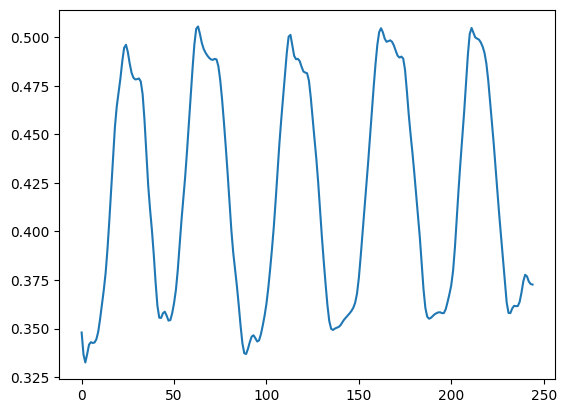

In [15]:
plt.plot(data['UWhrbKTC']['data'][:,9,1])

In [87]:
for key, value in data.items():
    plt.plot(data[key]['data'][:,10,0])
    # plt.plot(data_unfiltered[key]['data'][:,9,1], label='unfiltered')
    # plt.plot(data_median[key]['data'][:,9,1], label='median')
    plt.savefig(f"E:/PhD Work (Local)/Sit to Stand Fall Risk/data/plots/x/{key}.png")
    plt.close()

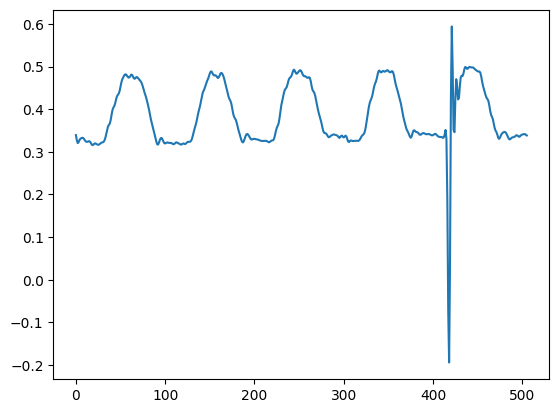

In [32]:
plt.plot(data['6HTqE41x']['data'][:,9,1])

In [128]:
data['ztKJoXiw']['framerate']

30

Detected 17 spikes.


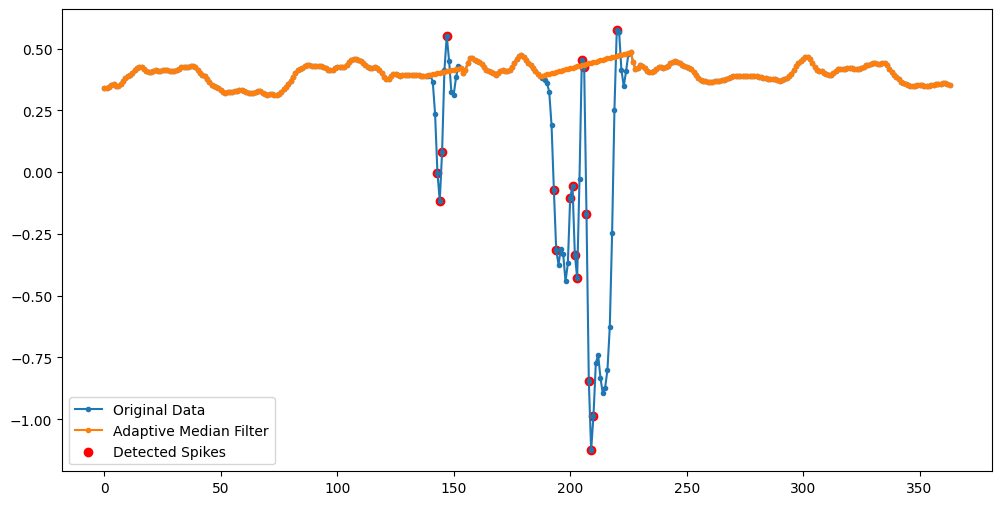

In [18]:
import numpy as np
from scipy.ndimage import median_filter

# Example data with sharp spikes
data_1 = data['iJsDlll8']['data'][:,9,1]

# Define a function to apply median filter only around detected spikes
def apply_median_to_spikes_adaptive(data, window_size, spike_factor=3):
    filtered_data = np.copy(data)
    
    # Compute the median-filtered signal (without altering the original data)
    median_filtered = median_filter(data, size=window_size)
    
    # Identify spikes by checking if a point deviates significantly from the local median
    deviations = np.abs(data - median_filtered)
    
    # Detect spikes where deviation is larger than spike_factor times the local median absolute deviation
    median_abs_deviation = np.median(deviations)
    spike_indices = np.where(deviations > spike_factor * median_abs_deviation)[0]

    print(f"Detected {len(spike_indices)} spikes.")
    
    # Apply median filter only around detected spikes
    for idx in spike_indices:
        start = max(0, idx - window_size // 2)
        end = min(len(data_1), idx + window_size // 2 + 1)
        
        # Apply median filter within this local window
        filtered_data[start:end] = np.nan #median_filter(data_1[start:end], size=window_size)
    
    return spike_indices, filtered_data

# Parameters: window size for median filtering and spike detection sensitivity
window_size = 10  # Size of the local window
spike_factor = 50  # Multiplier for spike detection sensitivity (higher = less sensitive)

# Apply the function
spkie_indices, filtered_data = apply_median_to_spikes_adaptive(data_1, window_size, spike_factor)

# linear interpolation to fill in the gaps
filtered_data = pd.Series(filtered_data).interpolate().values

plt.figure(figsize=(12, 6))
plt.plot(data_1, label='Original Data', marker='o', markersize=3)
plt.plot(filtered_data, label='Adaptive Median Filter', marker='o', markersize=3)
plt.scatter(spkie_indices, data_1[spkie_indices], color='red', label='Detected Spikes')
plt.legend()

In [25]:
# Parameters: window size for median filtering and spike detection sensitivity
window_size = 30  # Size of the local window
spike_factor = 50  # Multiplier for spike detection sensitivity (higher = less sensitive)

for key, value in data.items():
    try:
        plt.figure(figsize=(12, 6))
        spike_indices, filtered_data = apply_median_to_spikes_adaptive(data[key]['data'][:,9,1], window_size, spike_factor)
        plt.plot(data[key]['data'][:,9,1], label='Original Data', marker='o', markersize=3)
        plt.plot(filtered_data, label='Adaptive Median Filter', marker='o', markersize=3)
        plt.scatter(spike_indices, data[key]['data'][:,9,1][spike_indices], color='red', label='Detected Spikes')
        plt.legend()
        plt.savefig(f"E:/PhD Work (Local)/Sit to Stand Fall Risk/data/plots/y/{key}.png")
        plt.close()
    except:
        print(f"Error in {key}")


Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 spikes.
Detected 0 s

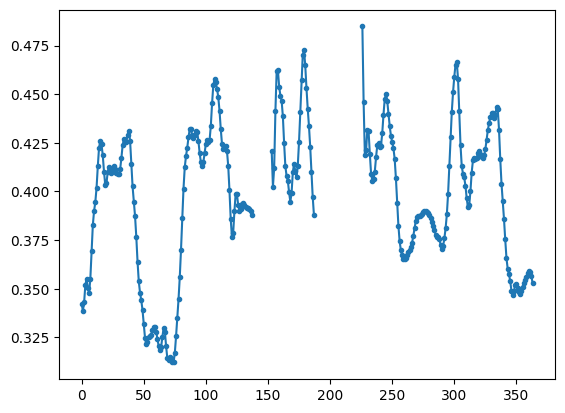

In [107]:
plt.plot(filtered_data, label='Adaptive Median Filter', marker='o', markersize=3)

In [251]:
def center_ts(res):
    res.shape

    scale = (res[:,(NECK*3):(NECK*3+3)] - res[:,(MHIP*3):(MHIP*3+3)])[:,:2]
    scale = np.sqrt(np.sum(scale**2,axis=1))
    scale = mean_perc(scale)
    print(scale)
    
    X = mean_perc(res[:,RANK*3])
    Y = mean_perc(res[:,RANK*3+1])
    
    for i in range(25):
        res[:,(i*3):(i*3+3)] = res[:,(i*3):(i*3+3)] - np.hstack([X,Y,0])[None,:]
        #res[:,(i*3):(i*3+3)] = res[:,(i*3):(i*3+3)]
    return res/scale  #[:,None]

888.3070632454231


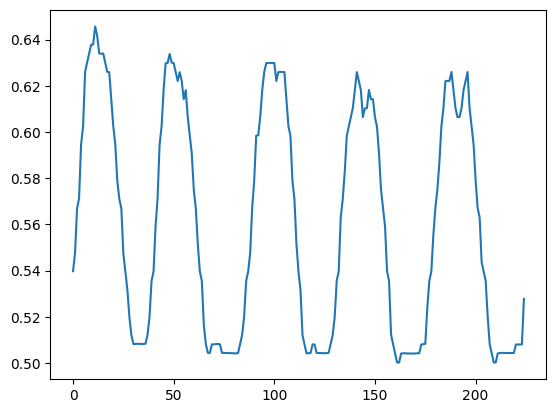

In [267]:
data_ind = np.load(r'E:\PhD Work (Local)\Sit to Stand Fall Risk\data\np_selected\dmWVXiPM.npy')
data_ind [:,1::3] = 50 + data_ind [:,1::3].max() - data_ind [:,1::3]
#data_ind = center_ts(data_ind)
ups, downs = get_segments(data_ind)
lengths = data_ind[ups[1]:ups[-2],3*NOSE:(3*NOSE+2)] - data_ind[ups[1]:ups[-2],3*RANK:(3*RANK+2)]
lengths = np.sqrt(np.sum(lengths**2, axis=1))
height = np.quantile(lengths, 0.95)
print(height)
delta = data_ind[:,3*RANK:(3*RANK+2)].copy()
for i in range(data_ind.shape[1]//3):
    data_ind[:,3*i:(3*i+2)] = (data_ind[:,3*i:(3*i+2)])/height
data_ind = data_ind[10:, np.arange(75) % 3 != 2]
data_ind = data_ind.reshape(data_ind.shape[0],-1, 2)
data_ind_d = data_ind[:,9,1]
plt.plot(data_ind_d)

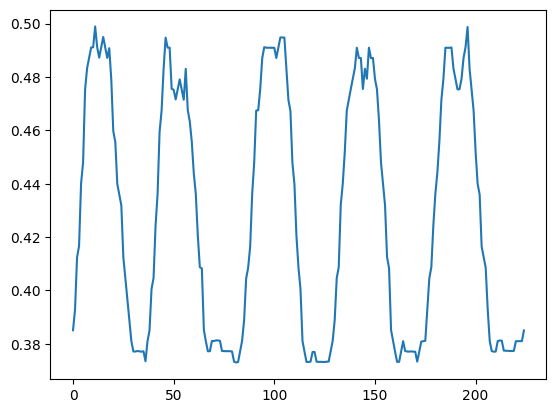

In [264]:
data_ind = np.load(r'E:\PhD Work (Local)\Sit to Stand Fall Risk\data\np_selected\dmWVXiPM.npy')
data_ind [:,1::3] = 50 + data_ind [:,1::3].max() - data_ind [:,1::3]
data_ind = data_ind[10:, np.arange(75) % 3 != 2]
data_ind = data_ind.reshape(data_ind.shape[0],-1, 2)
data_ind_d2 = (data_ind[:,9,1] - data_ind[:,11,1]) / (247.18224603498373 * 3.5943201739169073)
plt.plot(data_ind_d2)

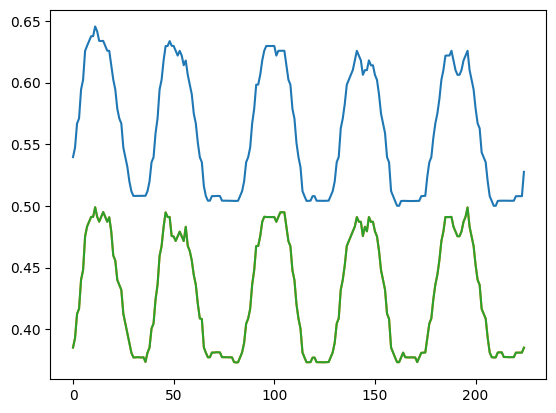

In [262]:
plt.plot(data_ind[:,9,1] /  (247.18224603498373 * 3.5943201739169073))
plt.plot(data_ind_d2)
plt.plot(data_ind_d)

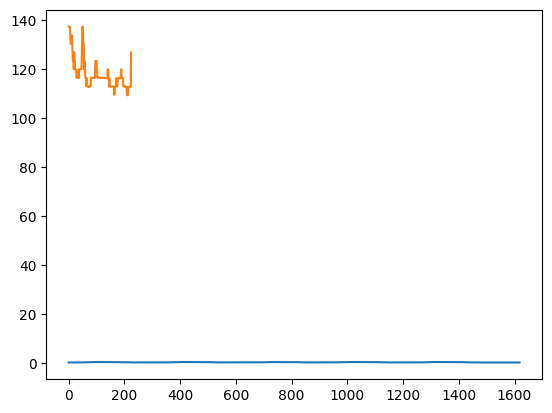

In [211]:
plt.plot(data_ind_wd)
plt.plot(data_ind_d)

In [130]:
data_ind = np.load(r'E:\PhD Work (Local)\Sit to Stand Fall Risk\data\np_selected\ztKJoXiw.npy')
# make it more intuitive by inverting Y
data_ind[:,1::3] = 50 + data_ind[:,1::3].max() - data_ind[:,1::3]

md = np.median((data_ind[:,MHIP*3] - (data_ind[:,LKNE*3] + data_ind[:,RKNE*3])/2 ))

orientation = "R" if md < 0 else "L"
orientation

'R'

In [4]:
problematic_subjects_y_rhip = ['6HTqE41x', '15IPa5iS', 'AA9IzAL1', 'bePyG1Du', 
                               'Cw8bz9tw', 'GESYi2xq', 'HA57ijek', 'iJsDlll8', 
                               'JoT31ute', 'nGyTDr5q', 'PA4bXBlr', 'qUI9PiJS', 
                               'sUlatygS', 'xgN0wuHW', 'ztKJoXiw']

problematic_subjects_x_rhip = ['AA9IzAL1', 'bePyG1Du', 
                               'Cw8bz9tw', 'g2W4FUSb', 'gQS9V6ab', 
                               'JoT31ute', 'qUI9PiJS', 
                               'sUlatygS', 'xgN0wuHW']

problematic_subjects_y_rankle = ['6HTqE41x', '15IPa5iS', 'AA9IzAL1', 'AVXJQX9B', 'bePyG1Du', 
                              'Cw8bz9tw', 'GESYi2xq', 'HA57ijek', 'iJsDlll8', 
                              'JoT31ute', 'nGyTDr5q', 'PA4bXBlr', 'qUI9PiJS', 
                              'sUlatygS', 'UpNWCJ9a', 'xgN0wuHW', 'ztKJoXiw']

In [58]:
data = np.load('time_series_all.npy', allow_pickle=True).item()
for sub in problematic_subjects:
    indices = np.int_(np.loadtxt(f'E:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\{sub}.txt')[:,0])
    data[sub]['data'][indices,:,1] = np.nan

    # Process each joint's time series to handle NaNs at the start or end
    for i in range(data[sub]['data'].shape[1]):  # assuming second axis is for the joints/positions
        series_with_nans = pd.Series(data[sub]['data'][:, i, 1])
        
        # Find the index of the first non-NaN value
        first_valid_index = series_with_nans.first_valid_index()
        
        # Find the index of the last non-NaN value
        last_valid_index = series_with_nans.last_valid_index()

        # Slice the series to remove the NaNs at the start and end
        trimmed_series = series_with_nans[first_valid_index:last_valid_index + 1]

        # Interpolate missing NaNs inside the valid range
        interpolated_series = trimmed_series.interpolate(method='linear', limit_area='inside')

        # Replace the original data with the trimmed and interpolated series
        # Make sure to retain the same shape for the other parts of the data
        data[sub]['data'][:, i, 1] = np.nan  # Set all to NaN initially
        data[sub]['data'][first_valid_index:last_valid_index + 1, i, 1] = interpolated_series.values
        data[sub]['trimmed_data'] = data[sub]['data'][first_valid_index:last_valid_index + 1]

In [63]:
# Load the data
data = np.load('time_series_all.npy', allow_pickle=True).item()

# Loop through all subjects
for sub in data.keys():
    
    if sub in problematic_subjects:
        # For problematic subjects, process NaNs and trim the data
        indices = np.int_(np.loadtxt(f'E:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\{sub}.txt')[:,0])
        data[sub]['data'][indices,:,1] = np.nan
        
        # Process each joint's time series to handle NaNs at the start or end
        for i in range(data[sub]['data'].shape[1]):  # assuming second axis is for the joints/positions
            series_with_nans = pd.Series(data[sub]['data'][:, i, 1])

            # Find the index of the first and last non-NaN values
            first_valid_index = series_with_nans.first_valid_index()
            last_valid_index = series_with_nans.last_valid_index()

            # Slice the series to remove the NaNs at the start and end
            trimmed_series = series_with_nans[first_valid_index:last_valid_index + 1]

            # Interpolate missing NaNs inside the valid range
            interpolated_series = trimmed_series.interpolate(method='linear', limit_area='inside')

            # Replace the original data with the trimmed and interpolated series
            data[sub]['data'][:, i, 1] = np.nan  # Set all to NaN initially
            data[sub]['data'][first_valid_index:last_valid_index + 1, i, 1] = interpolated_series.values

        # Store the trimmed data for problematic subjects
        data[sub]['trimmed_data'] = data[sub]['data'][first_valid_index:last_valid_index + 1]

    else:
        # For non-problematic subjects, create trimmed_data with the full original data
        data[sub]['trimmed_data'] = data[sub]['data']  # Copy the original unmodified data

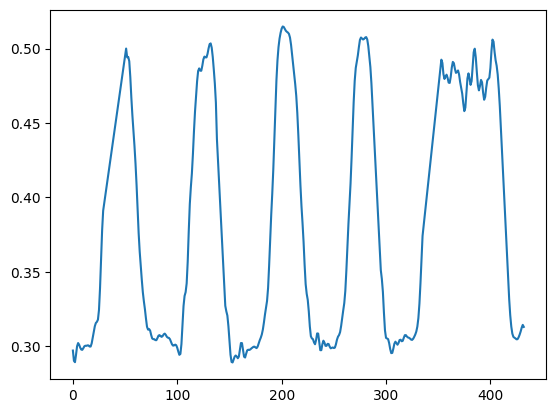

In [64]:
plt.plot(data['qUI9PiJS']['trimmed_data'][:,9,1])

In [65]:
np.sum(np.isnan(data['qUI9PiJS']['trimmed_data'][:,:,1]))

0

In [66]:
data['Qk66Dk9d'].keys()

dict_keys(['data', 'framerate', 'ups', 'downs', 'results', 'trimmed_data'])

In [68]:
for key, value in data.items():
    scipy.io.savemat(f'E:\PhD Work (Local)\Sit to Stand Fall Risk\data\matlab_data\cleaned\m_{key}.mat', {
        'data': value['trimmed_data'],      # Save the time series data
        'framerate': value['framerate']  # Save the framerate
    })

In [17]:
import numpy as np
data = np.load('time_series_without_delta.npy', allow_pickle=True).item()
for key, value in data.items():
    plt.plot(data[key]['data'][:,11,0])
    plt.savefig(f"E:/PhD Work (Local)/Sit to Stand Fall Risk/data/plots/r_ankle/x/{key}.png")
    plt.close()